# SIT742: Modern Data Science 
**(2021 Assessment Task 01 - Data Manipulation)**

---
- Please refer to the CloudDeakin for the detailed assessment requirements.
- Please submit to Clouddeakin before the due date.
- Students with difficulty in meeting the deadline because of illness, etc. must apply for an assignment extension (up to 3 days) no later than *12:00pm on 16/04/2021 (Friday)*.


Prepared by **SIT742 Teaching Team**


---

<div class="alert alert-block alert-info">
Enter your information in the following cell. Please make sure you fill your Student ID and Name correctly.  
</div>

**Student Information:** Please fill your information below

- Name:  Muhammad Kazim
- Student ID:  218200403
- Email:  kazimm@deakin.com.au
- Lab Session and Tutor (for on campus students): 

---

# Part I - Web Log Data

## Overview

Hotel TULIP a five-star hotel located at Deakin University, and its CIO Dr Bear Guts has asked the Team-SIT742 team to analyse the weblogs files. As an employee for Hotel Tulip, working in the Information Technology Division, it is required to prepare a set of documentation for Team-SIT742 to allow them to understand the data being dealt with. Throughout this report, some source codes are to explore the weblog, which afterwards the information is presented to Dr Bear Guts in the format of a report.

In this part, you are required to use give dataset to finish some required analysis, with the exploreation data analytics skills as well as visuilization skill.


You will be required to complete the coding to answer the questions with a neat and clean format, and you must keep outputs for code. Your commenting and adherence to code standards will also be considered when marking. Further information on Python standards, please visit https://www.python.org/dev/peps/pep-0008/ 


**Note**: You are not necessary to stick to the partial code provided, and you can write your own code to implement the required tasks. But you should provide sufficient comments.




## 1.  Data ETL

### 1.1 Data Loading

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
from datetime import datetime
from scipy import stats
import matplotlib
import os
import warnings
warnings.filterwarnings('ignore')

 <div class="alert alert-block alert-info">

**Code**: 
    You are required to load Hotel TULIP data into dataframe df_ht and check how many files are loaded.
    <br>
    *Keep the outputs for code in your notebook.
</div>



In [2]:
# Extracting zip file to 'HTWebLog_p1' folder
from zipfile import ZipFile
import os
with ZipFile("HTWebLog_p1.zip",'r') as myzip:
    myzip.extractall('HTWebLog_p1')

#Now loading all files from the folder to see file details and total count. this count should be the same when loading files
#into dataframe. The below path is for my pc kindly modify accordingly

path_dir=(r'C:\Users\kazim\Documents\Master of Data\2021\SIT742_Modern_Data_Science\Assignment 1\HTWebLog_p1')
for files in os.listdir(path_dir):
    print(files)
list = os.listdir(path_dir)
file_count = len(list)
print ("Total Files Unzippled: ",file_count)


ex061101.log
ex061102.log
ex061103.log
ex061104.log
ex061105.log
ex061106.log
ex061107.log
ex061108.log
ex061109.log
ex061110.log
ex061111.log
ex061112.log
ex061113.log
ex061114.log
ex061115.log
ex061116.log
ex061117.log
ex061118.log
ex061119.log
ex061120.log
ex061121.log
ex061122.log
ex061123.log
ex061124.log
ex061125.log
ex061126.log
ex061127.log
ex061128.log
ex061129.log
ex061130.log
ex061201.log
ex061202.log
ex061203.log
ex061204.log
ex061205.log
ex061206.log
ex061207.log
ex061208.log
ex061209.log
ex061210.log
ex061211.log
ex061212.log
ex061213.log
ex061214.log
ex061215.log
ex061216.log
ex061217.log
ex061218.log
ex061219.log
ex061220.log
ex061221.log
ex061222.log
ex061223.log
ex061224.log
ex061225.log
ex061226.log
ex061227.log
ex061228.log
ex061229.log
ex061230.log
ex061231.log
ex070101.log
ex070102.log
ex070103.log
ex070104.log
ex070105.log
ex070106.log
ex070107.log
ex070108.log
ex070109.log
ex070110.log
ex070111.log
ex070112.log
ex070113.log
ex070114.log
ex070115.log
ex070116.log

In [3]:
#Loading files to df_ht_1 dataframe

path_dir_1=r'C:/Users/kazim/Documents/Master of Data/2021/SIT742_Modern_Data_Science/Assignment 1/HTWebLog_p1/'
df_ht_1=pd.DataFrame()
File_count=0
for files in os.listdir(path_dir_1):
    pd_1=pd.read_csv(path_dir_1+files,skiprows=3,header=None,delimiter='\t',encoding= 'unicode_escape')
    df_ht_1=pd.concat([df_ht_1,pd_1])
    File_count=File_count+1 
df_ht_1
print("Total Files Loaded: ",File_count)        

Total Files Loaded:  120


In [4]:
#Checking initial data format i.e header position and columns arrangement
df_ht_1.head()

,0
0,#Fields: date time s-sitename s-ip cs-method c...
1,2006-11-01 00:00:08 W3SVC1 127.0.0.1 GET /Defa...
2,2006-11-01 00:00:08 W3SVC1 127.0.0.1 GET /Tuli...
3,2006-11-01 00:00:08 W3SVC1 127.0.0.1 GET /Tuli...
4,2006-11-01 00:00:09 W3SVC1 127.0.0.1 GET /Tuli...


In [5]:
#From above we can see that the data is coming in a signle column and header cleanup also required
#Formatting: Splitting dataframe according to space and also Re-arraning columns and headers
#Warning: This will take a while to execute due to big data size as all rows will be re-arranged

#Step-1: Spliting the column filed by space and assigning to new df header and droping old header
df_ht=df_ht_1[0].str.split(' ', expand=True)
df_ht.columns = df_ht.iloc[0]
df_ht.drop([0],axis=0,inplace=True)

In [6]:
#Step-2: Removing '#Fields' from header and assigning col names to new list
header=df_ht.columns
header_new=header[1:-1]

In [7]:
#Step-3: Removing additional columns from th end added during data extraction and assnging column names
df_ht=df_ht.iloc[:,:-2]
df_ht.columns=header_new
df_ht.head()

,date,time,s-sitename,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status
1,2006-11-01,00:00:08,W3SVC1,127.0.0.1,GET,/Default.aspx,-,80,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.google.com/search?sourceid=navclien...,200,0,0
2,2006-11-01,00:00:08,W3SVC1,127.0.0.1,GET,/Tulip/home/en-us/home_index.aspx,-,80,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,-,200,0,0
3,2006-11-01,00:00:08,W3SVC1,127.0.0.1,GET,/Tulip/includes/js/CommonUtil.js,-,80,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200,0,0
4,2006-11-01,00:00:09,W3SVC1,127.0.0.1,GET,/Tulip/common/common_style.aspx,lang=en-us,80,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200,0,0
5,2006-11-01,00:00:09,W3SVC1,127.0.0.1,GET,/Tulip/common/en-us/images/top_img.jpg,-,80,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200,0,0


 <div class="alert alert-block alert-info">

**Code**: 
    Check the data statistics and general information by printing its top 5 rows.
    <br>
    *Keep the outputs for code in your notebook.
</div>

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part I 1.1** Please include your result for this coding task into your SIT742-DataDictionary.xlsx, then add to your report - Part I with proper section title '1.1.1' and '1.1.2'.
</div>
    </div>


In [8]:
#Checking basic information of dataset like total number of records, total number column names,types and memory allocation 
print(df_ht.info())
len(df_ht)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8438976 entries, 1 to 63746
Data columns (total 15 columns):
date               object
time               object
s-sitename         object
s-ip               object
cs-method          object
cs-uri-stem        object
cs-uri-query       object
s-port             object
cs-username        object
c-ip               object
cs(User-Agent)     object
cs(Referer)        object
sc-status          object
sc-substatus       object
sc-win32-status    object
dtypes: object(15)
memory usage: 1.0+ GB
None


8438976

#### Remove all NAs from data


<div class="alert alert-block alert-warning">

**Code**: 
    1. Check which columns have NAs, <br>
    2. For each of those columns, display the number of NA records, <br> 
    3. emove all records with any NAs.
    <br>
    *Keep the outputs for code in your notebook.
</div> 

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part I 1.2** Please include your result for this coding task into your report Part I, with proper section title '1.2'.
</div>
    </div>


In [9]:
#Replacing '-' with nan so that we can remove them in later stage
#Warning: This operation may take a while to execute due to large datasize
df_ht.replace({"-":np.nan},inplace=True)

In [10]:
#Checking columns with NA values and their sum
df_ht.isnull().sum()

0
date                     0
time                     0
s-sitename              12
s-ip                    24
cs-method               24
cs-uri-stem             24
cs-uri-query       7886568
s-port                  36
cs-username        8438964
c-ip                    36
cs(User-Agent)        3563
cs(Referer)        1309030
sc-status               36
sc-substatus            36
sc-win32-status         36
dtype: int64

In [11]:
#Calculating NA percentage against high null value columns. if % exceeds 15%, these cols will be removed
cs_uri_query_null_avg=((df_ht['cs-uri-query'].isnull().sum())/len(df_ht))*100
cs_username_null_avg=((df_ht['cs-username'].isnull().sum())/len(df_ht))*100
cs_Referer_null_avg=((df_ht['cs(Referer)'].isnull().sum())/len(df_ht))*100
print(cs_uri_query_null_avg)
print(cs_username_null_avg)
print(cs_Referer_null_avg)

93.45408732054695
99.99985780265284
15.511716113424187


In [12]:
#All 03 columns exceeding 15% na values, so removing them from the dataset
df_ht.drop(['cs-uri-query','cs-username','cs(Referer)'], axis = 1,inplace=True)  

In [12]:
#Checking na value status after removing high null value columns
df_ht.isnull().sum()

0
date                  0
time                  0
s-sitename           12
s-ip                 24
cs-method            24
cs-uri-stem          24
s-port               36
c-ip                 36
cs(User-Agent)     3563
sc-status            36
sc-substatus         36
sc-win32-status      36
dtype: int64

In [13]:
#Removing NA values. 
#Due to large size of dataset, it will throw memory error if we try to remove NA at once as the data will be held into memory 
#for the entire operation.To avoid this, dataset is divided into chunks of 2 Mil records, applied NA remove func and then 
#Concatenated again into a singe df

#Chunk size
n = 2000000  
#Spliting into df_ht into chunks
split_df = [df_ht[i:i+n] for i in range(0,df_ht.shape[0],n)]
#Checking total number of chunks
len([i.shape for i in split_df])


5

In [14]:
#Removing NA from all chunks and combining back into single dataframe
#Warning: This may take a while to execute due to large data size

split_df[0].dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
split_df[1].dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
split_df[2].dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
split_df[3].dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
split_df[4].dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

In [15]:
#Combining split datasets to single df
df_new=[split_df[0],split_df[1],split_df[2],split_df[3],split_df[4]]
df_ht_final=pd.concat(df_new)

In [16]:
#Status After removing NA
df_ht_final.isnull().sum()

0
date               0
time               0
s-sitename         0
s-ip               0
cs-method          0
cs-uri-stem        0
s-port             0
c-ip               0
cs(User-Agent)     0
sc-status          0
sc-substatus       0
sc-win32-status    0
dtype: int64

In [17]:
#Data frame values after clean up
print(df_ht_final.info())
print(len(df_ht_final))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8435413 entries, 1 to 63746
Data columns (total 12 columns):
date               object
time               object
s-sitename         object
s-ip               object
cs-method          object
cs-uri-stem        object
s-port             object
c-ip               object
cs(User-Agent)     object
sc-status          object
sc-substatus       object
sc-win32-status    object
dtypes: object(12)
memory usage: 836.6+ MB
None
8435413


In [40]:
#df_ht_2['cs-method'].value_counts()

GET         8421984
POST           9509
HEAD           6723
OPTIONS         595
PROPFIND        106
Services         12
s-ip             12
PUT              11
Name: cs-method, dtype: int64

## 2. Data Statistics Description

### 2.1 Traffic Analysis


<div class="alert alert-block alert-warning">

**Code**: 
    Discover on the traffics by analysing hourly requests, then plot it into Bar Chart.
    <br>
    *Keep the outputs for code in your notebook.
</div> 

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part I 2.1.A** Please include your result for this coding task into your report Part I, with proper section title '2.1.A'.
</div>
    </div>


#### By day and plot 



In [18]:
# Create a bar chart of the number of server requests by hour of the day
#Since each row represent a request, we either can add the indexes of all rows to get total request or count the no of entries
#of a particular non-zero column


#Extracting subset of original data from 1 to 5th column

df_plot=df_ht_final.iloc[0:,0:5]

In [19]:
#Removing unwanted columns
df_plot.drop(['s-sitename','s-ip'], axis=1, inplace=True)
#df_plot.tail(100)
#Filtering date from 1st Nov 2006 to 28th Feb 2007
df_plot_filter=df_plot.loc[(df_plot.date>='2006-11-01') & (df_plot.date<='2007-02-28')]


In [20]:
#Converting time into time format
#Warning: This may take a while to execute due to large data size

df_plot_filter['time'] = pd.to_datetime(df_plot_filter['time'])
df_plot_filter['time'] = df_plot_filter['time'].dt.hour


In [21]:
#Removing date column as its no longer required and Grouping all request with respect to time

df_plot_filter.drop(['date'], axis=1, inplace=True)
df_time=df_plot_filter.groupby(['time']).count()
#df_time.rename(columns={'cs-method':'Hourly requests'})
df_time

,cs-method
time,
0,155913
1,344334
2,432290
3,546655
4,529352
5,487330
6,544734
7,522365
8,550744


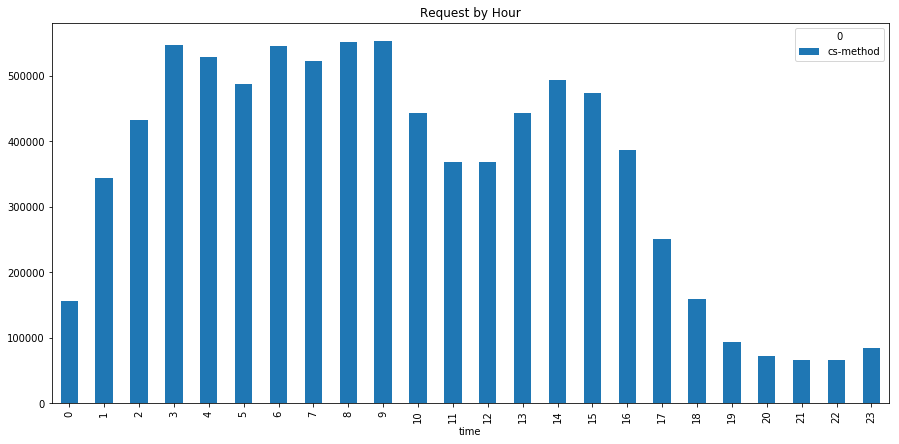

In [22]:
df_time.plot(kind='bar',title='Request by Hour',figsize=(15,7))


<div class="alert alert-block alert-warning">

**Code**: 
    You are required to filter the hourly requests by removing any below 490,000 and above 400,000. (hourly_request_amount >= 400000 & hourly_request_amount <= 490000)    
    <br>
    *Keep the outputs for code in your notebook.
</div> 

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part I 2.1.B** Please include your result for this coding task into your report, with proper section title '2.1.B'.
</div>
    </div>


In [23]:
#Filtering data below 490k and above 400k
hourly_request = df_time[(df_time['cs-method'] >=400000) & (df_time['cs-method'] <= 490000)]
hourly_request.rename(columns={'cs-method':'Hourly requests'})

,Hourly requests
time,
2,432290
5,487330
10,443519
13,442429
15,473057


### 2.2 Server Analysis

<div class="alert alert-block alert-warning">

**Code**: 
    Discover on the server status using 'sc-status' from DataFrame, then plot it into Pie Chart. <br>
    *Keep the outputs for code in your notebook.
</div> 

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part I 2.2** Please include your results for this coding task into your report Part I section '2.2', <br>
    1. How many types of status reported? <br>
    2. Figure 'Server Status' in pie chart. <br>
</div>

In [18]:
df_ht_final.head(100)

,date,time,s-sitename,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status
1,2006-11-01,00:00:08,W3SVC1,127.0.0.1,GET,/Default.aspx,-,80,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.google.com/search?sourceid=navclien...,200,0,0
2,2006-11-01,00:00:08,W3SVC1,127.0.0.1,GET,/Tulip/home/en-us/home_index.aspx,-,80,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,-,200,0,0
3,2006-11-01,00:00:08,W3SVC1,127.0.0.1,GET,/Tulip/includes/js/CommonUtil.js,-,80,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200,0,0
4,2006-11-01,00:00:09,W3SVC1,127.0.0.1,GET,/Tulip/common/common_style.aspx,lang=en-us,80,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200,0,0
5,2006-11-01,00:00:09,W3SVC1,127.0.0.1,GET,/Tulip/common/en-us/images/top_img.jpg,-,80,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200,0,0
6,2006-11-01,00:00:09,W3SVC1,127.0.0.1,GET,/Tulip/common/en-us/images/top_logo.gif,-,80,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200,0,0
7,2006-11-01,00:00:09,W3SVC1,127.0.0.1,GET,/Tulip/common/en-us/images/topmenu_reservation...,-,80,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200,0,0
8,2006-11-01,00:00:09,W3SVC1,127.0.0.1,GET,/Tulip/common/en-us/images/topmenu_contactus.gif,-,80,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200,0,0
9,2006-11-01,00:00:10,W3SVC1,127.0.0.1,GET,/Tulip/common/en-us/images/topmenu_ja.gif,-,80,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200,0,0
10,2006-11-01,00:00:10,W3SVC1,127.0.0.1,GET,/Tulip/common/images/top_bar.jpg,-,80,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200,0,0


In [24]:
#Lets first check data categories and values
sc_status=df_ht_final['sc-status'].value_counts()
sc_status

200            6072524
304            2136930
404             142583
206              72472
302               7366
500               2013
403                700
301                433
400                210
501                113
406                 54
cs(Referer)         12
416                  3
Name: sc-status, dtype: int64

In [25]:
#there are some junk values appearing with name (csReferer) probably because of some issues in the loading log files
#Searching the indexes and deleting rows with csReferer entry
junk_val = df_ht_final[df_ht_final['sc-status'] == 'cs(Referer)'].index
df_ht_final.drop(junk_val , inplace=True)
sc_status=df_ht_final['sc-status'].value_counts()
sc_status

200    6071861
304    2136682
404     142568
206      72462
302       7365
500       2013
403        700
301        433
400        210
501        113
406         54
416          3
Name: sc-status, dtype: int64

#### Server Status

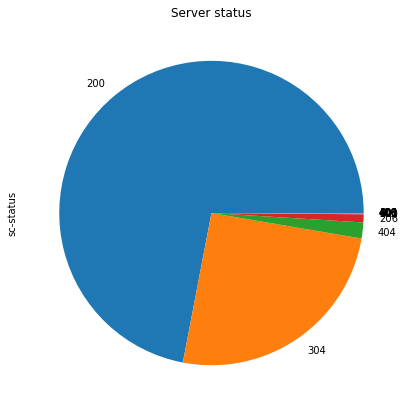

In [26]:
#Plotting server status in pie chart
sc_status.plot(kind='pie',title='Server status',figsize=(7, 7))

### 2.3 Geographic Analysis

Clinet's IP addresses can reflect geographic information. Since different IP are from different countries even citys, we can find out the demographics information from them. You may use **DbIpCity** from **ip2geotools** to find the geolocation information from given IPs.

**Notes:**
There are some attributes in ip2geotools can help: <br>
*ip_address*: IP address <br>
*city*: city where IP address is located <br>
*region*: region where IP address is located <br>
*country*: country where IP address is located (two letters country code) <br>

# 2.3.A Requests by Country
<div class="alert alert-block alert-warning">

**Code**: 
    Build your code with the following requirements <br>
    1. Select all requests at 01 Jan 2007 from 20:00:00 pm to 20:59:59. <br>
    2. Discover on the demographics by analysing requests from country level. <br>
    3. Plot countries of all requests in pie chart. <br>
    4. List top 3 with the numbers of requests. <br>
    *Keep the outputs for code in your notebook.
</div> 

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part I 2.3.A** Please include your results for this coding task into your report Part I section '2.3.A', <br>
    1. How many requests raised in the period of time? <br>
    2. How many countries are invlolved? <br>
    3. Figure 'Request by Country' in pie chart. <br>
    4. top 3 countries with request numbers. <br>
</div>

In [27]:
from ip2geotools.databases.noncommercial import DbIpCity

#Step-1: Filtering date : 2007-01-01

df_filter_date=df_ht_final.loc[(df_ht_final.date=='2007-01-01')]

#Step-1: Filtering time : 20:00:00 till 20:59:59

df_filter_time=df_filter_date.loc[(df_filter_date.time>='20:00:00')&(df_filter_date.time<='20:59:59')]

#Adding 02 new columns for city and country at position 10 and 11

df_filter_time.insert(10,'City',' ')
df_filter_time.insert(11,'Country',' ')
df_filter_time.tail()

,date,time,s-sitename,s-ip,cs-method,cs-uri-stem,s-port,c-ip,cs(User-Agent),sc-status,City,Country,sc-substatus,sc-win32-status
29033,2007-01-01,20:52:46,W3SVC1,127.0.0.1,GET,/robots.txt,80,74.6.85.161,Mozilla/5.0+(compatible;+Yahoo!+Slurp;+http://...,404,,,0,2
29034,2007-01-01,20:52:48,W3SVC1,127.0.0.1,GET,/Tulip/dining/zh-hk/dining_cafeserena.aspx,80,74.6.85.206,Mozilla/5.0+(compatible;+Yahoo!+Slurp;+http://...,200,,,0,0
29035,2007-01-01,20:59:04,W3SVC1,127.0.0.1,GET,/Tulip/whatsnew/whatsnew_roomsdetail.aspx,80,202.160.178.181,Mozilla/5.0+(compatible;+Yahoo!+Slurp+China;+h...,200,,,0,0
29036,2007-01-01,20:59:40,W3SVC1,127.0.0.1,GET,/robots.txt,80,74.6.75.47,Mozilla/5.0+(compatible;+Yahoo!+Slurp;+http://...,404,,,0,2
29037,2007-01-01,20:59:41,W3SVC1,127.0.0.1,GET,/Tulip/whatsnew/whatsnew_fooddetail.aspx,80,74.6.73.79,Mozilla/5.0+(compatible;+Yahoo!+Slurp;+http://...,200,,,0,0


In [28]:
#How many requests raised
print("Total number of requests in filtered time period: ",df_filter_time.shape[0])

Total number of requests in filtered time period:  214


In [29]:
#How many countries involved
def IP_Country(ip):
    try:
        return DbIpCity.get(ip, api_key = 'free').country
    except:
        return np.nan
df_filter_time['Country'] = df_filter_time.loc[:, 'c-ip'].apply(IP_Country)

print("Total number of Countries involved: ",df_filter_time['Country'].unique())

Total number of Countries involved:  ['HK' 'IT' 'CN' 'US' 'AU']


In [30]:
#Top three cities with number of requests
df_filter_time['Country'].value_counts().nlargest(3)

HK    169
CN     25
US     16
Name: Country, dtype: int64

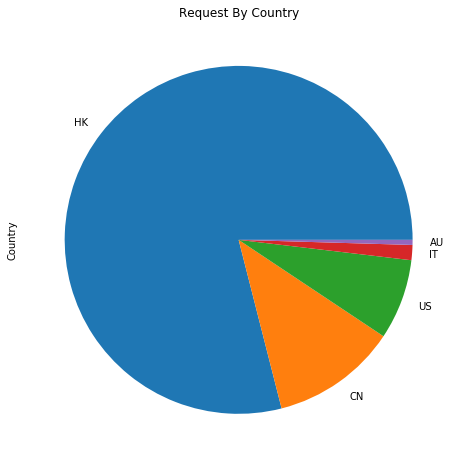

In [31]:
# Create a pie chart of the country values
req_country=df_filter_time['Country'].value_counts()
req_country.plot(kind='pie',title='Request By Country',figsize=(8, 8))

#### 2.3.B Requests by City
<div class="alert alert-block alert-warning">

**Code**: 
    Using the selected requests from 2.3.A and build your code with the following requirements <br>
    1. Discover on the demographics by analysing requests from city level. <br>
    2. Plot cities of all requests in pie chart. <br>
    3. List top 3 with the numbers of requests. <br>
    *Keep the outputs for code in your notebook.
</div> 

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part I 2.3.B** Please include your results for this coding task into your report Part I section '2.3.B', <br>
    1. How many cites are invlolved? <br>
    2. Figure 'Request by City' in pie chart. <br>
    3. Top 3 cities with request numbers. <br>
</div>

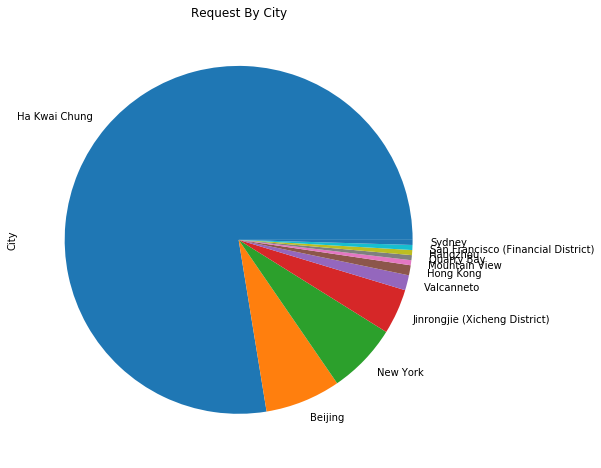

In [32]:
def IP_City(ip):
    try:
        return DbIpCity.get(ip, api_key = 'free').city
    except:
        return np.nan
df_filter_time['City'] = df_filter_time.loc[:, 'c-ip'].apply(IP_City)
req_city=df_filter_time['City'].value_counts()
req_city.plot(kind='pie',title='Request By City',figsize=(8, 8))

In [33]:
#How many cities invovled
df_filter_time['City'].unique()

array(['Hong Kong', 'Valcanneto', 'Jinrongjie (Xicheng District)',
       'Quarry Bay', 'Beijing', 'San Francisco (Financial District)',
       'Sydney', 'New York', 'Hangzhou', 'Mountain View', 'Ha Kwai Chung'],
      dtype=object)

In [34]:
#Top three cities with number of requests
df_filter_time['City'].value_counts().nlargest(3)

Ha Kwai Chung    166
Beijing           15
New York          14
Name: City, dtype: int64

# Part II - Web Crawling

## Overview
To better introduce all the professors including the emeritus professor, the professor and also associate professor in Deakin University School of IT, faculty will need to know all the citation information on all professors. Google Scholar is a web search engine that freely indexes the metadata of articles on many authors. Majority of the professors choose to use google scholar to track their publications and research works. Therefore,  the web crawling on google scholar will be able to have the citation information obtained across all the professors (who have the google scholar profile).


## 3. Professor List Generation

### 3.1 Import and install web crawling library. 

<div class="alert alert-block alert-warning">

**Code**: 
    Import and install your web crawling library here. 
</div> 

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part II 3.1** Please include your result for this coding task into your report Part II, with proper section title '3.1'.
</div>

*hint: you could use selenium by doing the pip install selenium, download the webdriver for chromedriver and define your webdriver for crawling. But you are free to use any other library*



In [35]:
# write your import and necessary web crawling libary here
#!pip install beautifulsoup4
#!pip install lxml
#!pip install html5lib
#!pip install requests
from bs4 import BeautifulSoup as bs
import requests

In [36]:
#Extracting html content for an overview
source=requests.get('https://www.deakin.edu.au/information-technology/staff-listing').text
soup=bs(source,'lxml')
#print(soup.prettify())

In [37]:
#web Crawler for Professor names
source=requests.get('https://www.deakin.edu.au/information-technology/staff-listing').text
soup=bs(source,'lxml')
#Emeritus professor
e_prof=soup.find('div', class_='module__content-panel--table')
emeritus_prof=e_prof.find_all('a')
prof_list = []
for i in emeritus_prof:
    #print(i.text)
    prof_list.append(i.text)
#Professor
prof_1=soup.find('div', class_='module__content-panel--table').find_next('div', class_='module__content-panel--table')
prof_=prof_1.find_all('a')

for i in prof_:
    #print(i.text)
    prof_list.append(i.text)
#Associate Professors
prof_2=soup.find('div', class_='module__content-panel--table').find_next('div', class_='module__content-panel--table').find_next('div', class_='module__content-panel--table')
prof_a=prof_2.find_all('a')

for i in prof_a:
    #print(i.text)
    prof_list.append(i.text)

prof_df=pd.DataFrame(prof_list)
prof_df


,0
0,Emeritus Professor Lynn Batten
1,Emeritus Professor Andrzej Goscinski
2,Professor Jemal Abawajy
3,Professor Maia Angelova
4,Professor Gleb Beliakov
5,Professor Terry Caelli
6,Professor Jinho Choi
7,Professor Chang-Tsun Li
8,Professor Robin Doss
9,Professor Peter Eklund


### 3.2 Find all professors in School of IT and save it as csv. 

<div class="alert alert-block alert-warning">

**Code**: 
    Find all professors in Schoolf of IT and save it as csv. The csv must have the full name of the professor (in one column), the title of the professor and University Name.
</div> 

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part II 3.2** Please include your result for this coding task into your report Part II, with proper section title '3.2'.
</div>



*hint: the url of the staff list for school of IT is https://www.deakin.edu.au/information-technology/staff-listing. you may need to iteratively find out html tag by table in the page to start crawl all the text from td (td is the elements in html table, check https://www.w3schools.com/html/html_tables.asp)*

In [38]:
# here we first define the parsing method, you will need to use this parsing method to format the professor full name and title from the staff page.
# the name of the professor from staff page will be split by space and last two words are full name 
def parse_name(stringtext):
  return " ".join(stringtext.split(" ")[-2:])," ".join(stringtext.split(" ")[:-2])

In [39]:
# the crawling information will be stored in pandas dataframe and then save as csv
# below you are required to use the parse_name method to crawl the professor's full name and title
# The column name must be same as the provided professor-list.csv
final_list=[]
for i in prof_df.itertuples(index=False):
    final_list.append(parse_name(i[0]))

prof_df=pd.DataFrame(final_list)
prof_df['new'] = pd.Series(['Deakin University' for x in range(len(prof_df.index))], index=prof_df.index)
heading=['Name','Title','University']
prof_df.columns=heading
print(prof_df)
#Exporting to csv
prof_df.to_csv('Professor-name-list.csv',index=0)

                    Name                Title         University
0            Lynn Batten   Emeritus Professor  Deakin University
1      Andrzej Goscinski   Emeritus Professor  Deakin University
2          Jemal Abawajy            Professor  Deakin University
3          Maia Angelova            Professor  Deakin University
4          Gleb Beliakov            Professor  Deakin University
5           Terry Caelli            Professor  Deakin University
6             Jinho Choi            Professor  Deakin University
7          Chang-Tsun Li            Professor  Deakin University
8             Robin Doss            Professor  Deakin University
9           Peter Eklund            Professor  Deakin University
10             Seng Loke            Professor  Deakin University
11  Antonio Robles-Kelly            Professor  Deakin University
12    Jean-Guy Schneider            Professor  Deakin University
13            Yong Xiang            Professor  Deakin University
14         John Yearwood 

## 4. Professor Citation Information Generation


### 4.1 Search the google scholar for all professors 
<div class="alert alert-block alert-warning">

**Code**: 
    Search the google scholar for all professors and obtain their citations-all, h-index-all, i10-all, citation-since2016,h-index-2016 and i10-since2016. Save the results as csv and must having **all the professors name, title and all 6 citation information.**
</div> 

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part II 4.1** Please include your result for this coding task into your report Part II, with proper section title '4.1'.
</div>


*hint: if the professors did not have the google scholar profle with the name, save the 6 citation information as string "na". you could use the while loop with condition or for loop with if condition or for loop with defined method having if condition to deal with those professors do not have google scholar*

In [ ]:
# search the google scholar for all professors to obtain their citations_all, h-index_all, i10_all, citation_since2016
# h-index-2016 and i10_since2016. Save the results as csv and must having all the professors name, title and all 6 citation information.
# if the professors did not have the google scholar profle with the name, save the 6 citation information as string "na"
# you are requests to use loops and Conditional Statements to finish this task (eg: while / for, if...), failed to use loop
# and conditional statements will occur 0 mark.
# hint: sometimes, to render the google scholar page, you need to wait for the brower for few seconds, you could use "from time import sleep"
# to have sleep(5) as the wait action for waiting 5 seconds.  
# The column name must be same as the provided professor-citation-information.csv 
# write your code for this part as below:



In [40]:
#For crawling through google profile page, We need to define a search method
user_profile=pd.read_csv('Professor-name-list.csv')
user_profile['Search Method']=user_profile['Name']+" "+user_profile['University']
user_profile

,Name,Title,University,Search Method
0,Lynn Batten,Emeritus Professor,Deakin University,Lynn Batten Deakin University
1,Andrzej Goscinski,Emeritus Professor,Deakin University,Andrzej Goscinski Deakin University
2,Jemal Abawajy,Professor,Deakin University,Jemal Abawajy Deakin University
3,Maia Angelova,Professor,Deakin University,Maia Angelova Deakin University
4,Gleb Beliakov,Professor,Deakin University,Gleb Beliakov Deakin University
5,Terry Caelli,Professor,Deakin University,Terry Caelli Deakin University
6,Jinho Choi,Professor,Deakin University,Jinho Choi Deakin University
7,Chang-Tsun Li,Professor,Deakin University,Chang-Tsun Li Deakin University
8,Robin Doss,Professor,Deakin University,Robin Doss Deakin University
9,Peter Eklund,Professor,Deakin University,Peter Eklund Deakin University


In [41]:
#Warning:Incase of accidently blocking run code through vpn or proxy.
from time import sleep
queries=user_profile['Search Method']

headers = {'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2) AppleWebKit/601.3.9 (KHTML, like Gecko) Version/9.0.2 Safari/601.3.9'}

profile_details=[]
with requests.Session() as s:
    for query in queries:
        url = 'https://scholar.google.com/scholar?q=' + query + '&ie=UTF-8&oe=UTF-8&hl=en&btnG=Search'
        r = s.get(url,headers=headers)
        soup = bs(r.content, 'lxml') # or 'html.parser'
        title = soup.find('h3',class_='gs_rt')
        title = title.text
        if 'User profiles' not in title:
            print('NA')
        else:
            title_href = soup.select_one('.gs_rt2 a')
            link = title_href['href']
            print(title," ",link)
            profile_details.append({"Title": title, "url": link})
        sleep(5)

User profiles for Lynn Batten Deakin University   /citations?user=Tmg0T9sAAAAJ&hl=en&oi=ao
NA
NA
User profiles for Maia Angelova Deakin University   /citations?user=CCF7GZoAAAAJ&hl=en&oi=ao
User profiles for Gleb Beliakov Deakin University   /citations?user=_plRpWEAAAAJ&hl=en&oi=ao
User profiles for Terry Caelli Deakin University   /citations?user=E9ZX2lgAAAAJ&hl=en&oi=ao
User profiles for Jinho Choi Deakin University   /citations?user=QzFia5YAAAAJ&hl=en&oi=ao
User profiles for Chang-Tsun Li Deakin University   /citations?user=nzLXktMAAAAJ&hl=en&oi=ao
NA
User profiles for Peter Eklund Deakin University   /citations?user=oE1fk_gAAAAJ&hl=en&oi=ao
User profiles for Seng Loke Deakin University   /citations?user=ZbdN-0AAAAAJ&hl=en&oi=ao
User profiles for Antonio Robles-Kelly Deakin University   /citations?user=y5249-IAAAAJ&hl=en&oi=ao
User profiles for Jean-Guy Schneider Deakin University   /citations?user=7ZrNsYEAAAAJ&hl=en&oi=ao
User profiles for Yong Xiang Deakin University   /citations?

In [42]:
#saving user profiles as dataframe as this will be used further 
user_details=pd.DataFrame(profile_details)
user_details.to_csv('Professor-prof-url.csv',index=0)

### 4.2 Find out the professor name having the most citations 

<div class="alert alert-block alert-warning">

**Code**: 
    Find out the professor name having the most citations (please remove those professor who does not have google scholar page)

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part II 4.2** Please include your result for this coding task into your report Part II, with proper section title '4.2'.
</div>


In [43]:
# find out the professor name having the most citations (please remove those professor who does not have google scholar page)

#Reading titles and extracted citation url, droping titles with NA i.e. no google profile title
profile_details=pd.read_csv('Professor-prof-url.csv').dropna()
#Adding new column with complete google scholar citation url as this will be input to crawl citation data 
profile_details['googlecitation']='https://scholar.google.com.au' + profile_details['url']
profile_details

,Title,url,googlecitation
0,User profiles for Lynn Batten Deakin University,/citations?user=Tmg0T9sAAAAJ&hl=en&oi=ao,https://scholar.google.com.au/citations?user=T...
1,User profiles for Maia Angelova Deakin University,/citations?user=CCF7GZoAAAAJ&hl=en&oi=ao,https://scholar.google.com.au/citations?user=C...
2,User profiles for Gleb Beliakov Deakin University,/citations?user=_plRpWEAAAAJ&hl=en&oi=ao,https://scholar.google.com.au/citations?user=_...
3,User profiles for Terry Caelli Deakin University,/citations?user=E9ZX2lgAAAAJ&hl=en&oi=ao,https://scholar.google.com.au/citations?user=E...
4,User profiles for Jinho Choi Deakin University,/citations?user=QzFia5YAAAAJ&hl=en&oi=ao,https://scholar.google.com.au/citations?user=Q...
5,User profiles for Chang-Tsun Li Deakin University,/citations?user=nzLXktMAAAAJ&hl=en&oi=ao,https://scholar.google.com.au/citations?user=n...
6,User profiles for Peter Eklund Deakin University,/citations?user=oE1fk_gAAAAJ&hl=en&oi=ao,https://scholar.google.com.au/citations?user=o...
7,User profiles for Seng Loke Deakin University,/citations?user=ZbdN-0AAAAAJ&hl=en&oi=ao,https://scholar.google.com.au/citations?user=Z...
8,User profiles for Antonio Robles-Kelly Deakin ...,/citations?user=y5249-IAAAAJ&hl=en&oi=ao,https://scholar.google.com.au/citations?user=y...
9,User profiles for Jean-Guy Schneider Deakin Un...,/citations?user=7ZrNsYEAAAAJ&hl=en&oi=ao,https://scholar.google.com.au/citations?user=7...


In [44]:
#Final Code for extracting citation details
queries=profile_details['googlecitation']

headers = {'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2) AppleWebKit/601.3.9 (KHTML, like Gecko) Version/9.0.2 Safari/601.3.9'}

Citations = []
h_index_=[]
i_10_=[]
with requests.Session() as s:
    for query in queries:
        url = query
        r = s.get(url,headers=headers)
        soup = bs(r.content, 'html.parser') # or 'html.parser'
        data = soup.tbody.find_all("tr")
        for td in data[0].find_all("td"):
            Citations.append(td.text)
        for td in data[1].find_all("td"):
            h_index_.append(td.text)
        for td in data[2].find_all("td"):
            i_10_.append(td.text)
        sleep(5)

cite_data=pd.DataFrame(Citations)
h_index=pd.DataFrame(h_index_)
i_10=pd.DataFrame(i_10_)
print(Citations)
print(h_index_)
print(i_10_)        

['Citations', '2528', '1172', 'Citations', '682', '399', 'Citations', '8173', '4632', 'Citations', '8665', '1477', 'Citations', '7822', '5031', 'Citations', '4344', '2339', 'Citations', '3962', '778', 'Citations', '7182', '2907', 'Citations', '3655', '1534', 'Citations', '1812', '646', 'Citations', '6308', '4971', 'Citations', '3793', '1998', 'Citations', '14939', '8339', 'Citations', '1863', '1263', 'Citations', '291', '194', 'Citations', '1472', '950', 'Citations', '1130', '811', 'Citations', '4117', '2826', 'Citations', '1463', '1084', 'Citations', '3223', '1753', 'Citations', '387', '310']
['h-index', '23', '16', 'h-index', '15', '11', 'h-index', '42', '32', 'h-index', '51', '20', 'h-index', '37', '29', 'h-index', '33', '21', 'h-index', '34', '14', 'h-index', '38', '21', 'h-index', '24', '15', 'h-index', '24', '15', 'h-index', '40', '35', 'h-index', '32', '23', 'h-index', '50', '33', 'h-index', '16', '15', 'h-index', '10', '9', 'h-index', '16', '13', 'h-index', '20', '18', 'h-index

In [45]:
#Now preparing the dataset as per required format.
def parse_name_2(stringtext):
  return " ".join(stringtext.split(" ")[3:-2])
#Removing unnecessary columns
del profile_details['url']
del profile_details['googlecitation']
#Extracting just name from profile_details dataframe
ls_1=[]
for i in profile_details.itertuples(index=False):
    ls_1.append(parse_name_2(i[0]))
temp_name=pd.DataFrame(ls_1)
heading=['Name']
temp_name.columns=heading

#Creating Professor-citation-information dataframe as per requirement
column_names=['Name','Citation-all','Citation-since2016','h-index-all','h-index-since2016','i10-index-all','i10-index-since2016']
temp_info=pd.DataFrame(columns=column_names)
temp_info['Name']=temp_name['Name']
#Extracting title information from user_profile dataframe defined above
prof_cite_info = pd.merge(temp_info,user_profile,on ='Name',how ='left')
del prof_cite_info['University']
del prof_cite_info['Search Method']
#Re-ordering columns
prof_cite_info=prof_cite_info[['Name','Title','Citation-all','Citation-since2016','h-index-all','h-index-since2016','i10-index-all','i10-index-since2016']]
prof_cite_info

,Name,Title,Citation-all,Citation-since2016,h-index-all,h-index-since2016,i10-index-all,i10-index-since2016
0,Lynn Batten,Emeritus Professor,NaN,NaN,NaN,NaN,NaN,NaN
1,Maia Angelova,Professor,NaN,NaN,NaN,NaN,NaN,NaN
2,Gleb Beliakov,Professor,NaN,NaN,NaN,NaN,NaN,NaN
3,Terry Caelli,Professor,NaN,NaN,NaN,NaN,NaN,NaN
4,Jinho Choi,Professor,NaN,NaN,NaN,NaN,NaN,NaN
5,Chang-Tsun Li,Professor,NaN,NaN,NaN,NaN,NaN,NaN
6,Peter Eklund,Professor,NaN,NaN,NaN,NaN,NaN,NaN
7,Seng Loke,Professor,NaN,NaN,NaN,NaN,NaN,NaN
8,Antonio Robles-Kelly,Professor,NaN,NaN,NaN,NaN,NaN,NaN
9,Jean-Guy Schneider,Professor,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
#Due to the complex nature of extracted data, multiple actions taken to clean it and assign to final dataset

#Citation data cleaning extracted above
cite_data=pd.DataFrame(Citations)
#Removing 'citations' from dataframe
cite_data.drop(cite_data.index[cite_data[0] == 'Citations'], inplace = True)
#Reindexing dataset
cite_data.reset_index(inplace=True)
del cite_data['index']
#As the dataframe is giving us citations in a columns for each prof i.e. citations_all and then citations2016. Taking mod of
#index and saving against categories will arrange the info as per requirement 
cite_all= cite_data[np.arange(len(cite_data)) % 2 == 0]
cite_2016= cite_data[np.arange(len(cite_data)) % 2 != 0]
#Re-indexing
cite_all.reset_index(inplace=True)
cite_2016.reset_index(inplace=True)
del cite_all['index']
del cite_2016['index']
prof_cite_info['Citation-all']=cite_all
prof_cite_info['Citation-since2016']=cite_2016

#H-index data cleaning
#same steps as above
h_index.drop(h_index.index[h_index[0] == 'h-index'], inplace = True)
h_index.reset_index(inplace=True)
del h_index['index']
h_index_all= h_index[np.arange(len(h_index)) % 2 == 0]
h_index_2016= h_index[np.arange(len(h_index)) % 2 != 0]
h_index_all.reset_index(inplace=True)
h_index_2016.reset_index(inplace=True)
del h_index_all['index']
del h_index_2016['index']
prof_cite_info['h-index-all']=h_index_all
prof_cite_info['h-index-since2016']=h_index_2016

#i-10 data cleaning
#Same steps as above
i_10.drop(i_10.index[i_10[0] == 'i10-index'], inplace = True)
i_10.reset_index(inplace=True)
del i_10['index']
i_10_all= i_10[np.arange(len(i_10)) % 2 == 0]
i_10_2016= i_10[np.arange(len(i_10)) % 2 != 0]
i_10_all.reset_index(inplace=True)
i_10_2016.reset_index(inplace=True)
del i_10_all['index']
del i_10_2016['index']
prof_cite_info['i10-index-all']=i_10_all
prof_cite_info['i10-index-since2016']=i_10_2016
#Exporting to csv as required
prof_cite_info.to_csv('Professor-citation-information.csv',index=None,header=True) 
prof_cite_info



,Name,Title,Citation-all,Citation-since2016,h-index-all,h-index-since2016,i10-index-all,i10-index-since2016
0,Lynn Batten,Emeritus Professor,2528,1172,23,16,45,21
1,Maia Angelova,Professor,682,399,15,11,21,14
2,Gleb Beliakov,Professor,8173,4632,42,32,135,86
3,Terry Caelli,Professor,8665,1477,51,20,177,36
4,Jinho Choi,Professor,7822,5031,37,29,168,96
5,Chang-Tsun Li,Professor,4344,2339,33,21,104,65
6,Peter Eklund,Professor,3962,778,34,14,72,23
7,Seng Loke,Professor,7182,2907,38,21,126,50
8,Antonio Robles-Kelly,Professor,3655,1534,24,15,62,27
9,Jean-Guy Schneider,Professor,1812,646,24,15,48,21


### 4.3 Find out the row for associate professor having the most i10-index since 2016 
<div class="alert alert-block alert-warning">

**Code**: 
    Find out the row for associate professor having the most i10-index since 2016 (please remove those professor who does not have google scholar page)

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part II 4.3** Please include your result for this coding task into your report Part II, with proper section title '4.3'.
</div>


In [47]:
#First converting non-string columns into numeric so we can run mathematical operations
cols=['Citation-all','Citation-since2016','h-index-all','h-index-since2016','i10-index-all','i10-index-since2016']
prof_cite_info[cols] = prof_cite_info[cols].apply(pd.to_numeric, errors='coerce',axis=1)
#Finding professor with highest number of citations
Highest_citation = prof_cite_info['Citation-all'].nlargest(1)
prof_cite_info[prof_cite_info['Citation-all'].isin(Highest_citation)]

,Name,Title,Citation-all,Citation-since2016,h-index-all,h-index-since2016,i10-index-all,i10-index-since2016
12,Arkady Zaslavsky,Professor,14939,8339,50,33,177,80


In [48]:
# find out the row for associate professor having the most i10_index since 2016 (please remove those professor who does not have google scholar page)
#Filtering out Associate professors
A_prof=prof_cite_info.loc[prof_cite_info['Title'] == 'Associate Professor']
#Priting info for highest i-10 index since 2016
top_1 = A_prof['i10-index-since2016'].nlargest(1)
A_prof[A_prof['i10-index-since2016'].isin(top_1)]

,Name,Title,Citation-all,Citation-since2016,h-index-all,h-index-since2016,i10-index-all,i10-index-since2016
17,Gang Li,Associate Professor,4117,2826,28,24,89,61


### 4.4 Find out all the professors name who has the citations_since2016 > 2500
<div class="alert alert-block alert-warning">

**Code**: 
    Find out the row for associate professor having the most i10-index since 2016 (please remove those professor who does not have google scholar page)

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part II 4.4** Please include your result for this coding task into your report Part II, with proper section title '4.4'.
</div>


In [49]:
# find out all the professors name who has the citations_since2016 > 2500
# write your code here

_prof=prof_cite_info.loc[prof_cite_info['Title'].isin(['Professor' , 'Associate Professor'])]

#Priting info for all professors having above 2500 citations since 2016
_prof.loc[_prof['Citation-since2016'] > 2500]


,Name,Title,Citation-all,Citation-since2016,h-index-all,h-index-since2016,i10-index-all,i10-index-since2016
2,Gleb Beliakov,Professor,8173,4632,42,32,135,86
4,Jinho Choi,Professor,7822,5031,37,29,168,96
7,Seng Loke,Professor,7182,2907,38,21,126,50
10,Yong Xiang,Professor,6308,4971,40,35,118,95
12,Arkady Zaslavsky,Professor,14939,8339,50,33,177,80
17,Gang Li,Associate Professor,4117,2826,28,24,89,61
